# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
##testing code for Sitka 
url = 'https://api.openweathermap.org/data/2.5/weather?'
city_url = f"{url}appid={weather_api_key}&q="
city_weather = requests.get(city_url+'sitka').json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.0531, 'lon': -135.33},
 'dt': 1682305471,
 'id': 5557293,
 'main': {'feels_like': 277.61,
          'humidity': 81,
          'pressure': 1000,
          'temp': 280.09,
          'temp_max': 280.09,
          'temp_min': 280.09},
 'name': 'Sitka',
 'rain': {'1h': 0.25, '3h': 1.27},
 'sys': {'country': 'US',
         'id': 7795,
         'sunrise': 1682256742,
         'sunset': 1682310393,
         'type': 1},
 'timezone': -28800,
 'visibility': 9656,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 200, 'speed': 3.6}}


In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | perevolotskiy
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | kyakhta
Processing Record 10 of Set 1 | walvis bay
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | eenhana
Processing Record 13 of Set 1 | prince george
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | vicosa
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | purisima de bustos
City not found. Skipping...
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | jalal-abad
Processing Record 22 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,perevolotskiy,51.8763,54.1938,282.95,64,3,1.40,RU,1682305475
1,waitangi,-43.9535,-176.5597,284.72,86,100,1.34,NZ,1682305476
2,isafjordur,66.0755,-23.1240,273.34,62,81,2.93,IS,1682305476
3,grytviken,-54.2811,-36.5092,274.79,80,81,8.19,GS,1682305477
4,bilibino,68.0546,166.4372,274.14,77,2,2.40,RU,1682305477


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,perevolotskiy,51.8763,54.1938,282.95,64,3,1.40,RU,1682305475
1,waitangi,-43.9535,-176.5597,284.72,86,100,1.34,NZ,1682305476
2,isafjordur,66.0755,-23.1240,273.34,62,81,2.93,IS,1682305476
3,grytviken,-54.2811,-36.5092,274.79,80,81,8.19,GS,1682305477
4,bilibino,68.0546,166.4372,274.14,77,2,2.40,RU,1682305477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
lat = city_data_df['Lat']
long = city_data_df['Lng']
lat

City_ID
0      51.8763
1     -43.9535
2      66.0755
3     -54.2811
4      68.0546
        ...   
578   -38.3739
579    10.4396
580   -26.6481
581    -7.7478
582    -2.6741
Name: Lat, Length: 583, dtype: float64

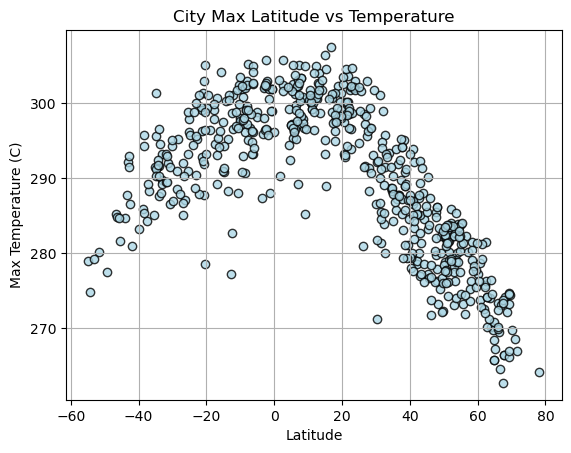

In [53]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, color="lightblue", alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

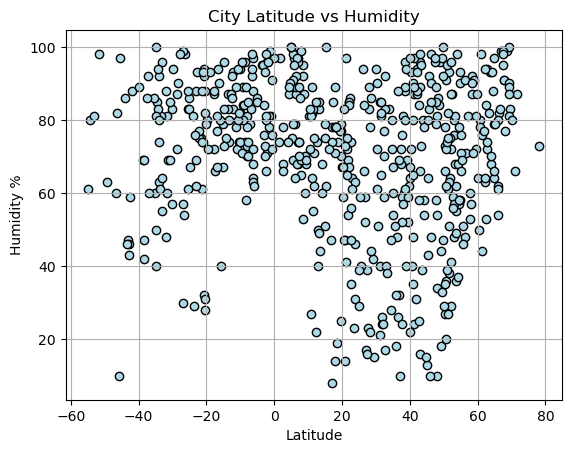

In [13]:
# Build the scatter plots for latitude vs. humidity
humid = temp = city_data_df['Humidity']
plt.scatter(lat, humid, color="lightblue", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

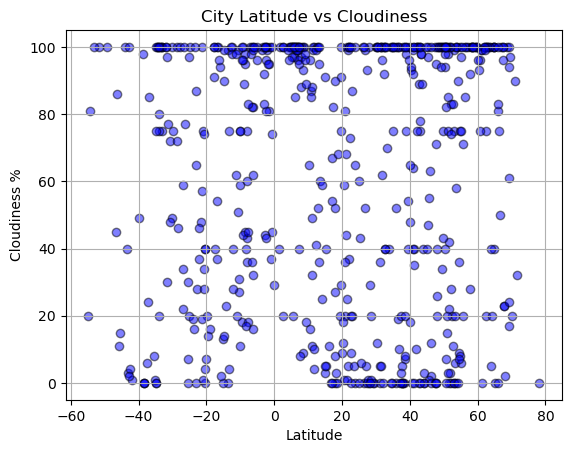

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cloud = temp = city_data_df['Cloudiness']
plt.scatter(lat,cloud, color="blue", alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

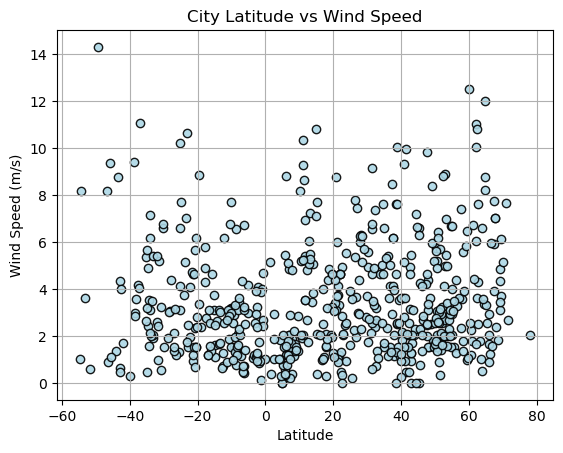

In [15]:
# Build the scatter plots for latitude vs. wind speed
speed = city_data_df['Wind Speed']
plt.scatter(lat,speed, color="lightblue", alpha = 0.9, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
from scipy import stats

City_ID
0      67.696169
1      75.652466
2      66.517277
3      76.509918
4      66.352961
         ...    
578    75.189218
579    71.136463
580    74.215680
581    72.646478
582    72.225232
Name: Lat, Length: 583, dtype: float64


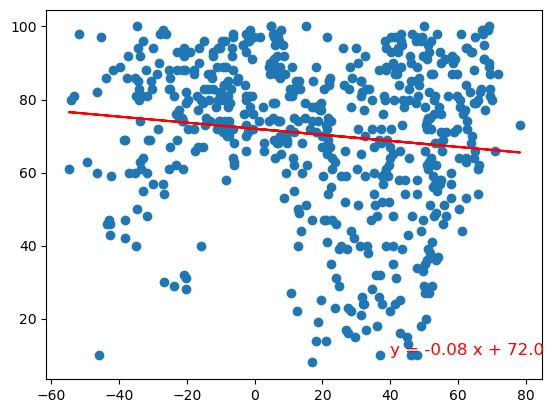

In [19]:
# Define a function to create Linear Regression plots
x = city_data_df['Lat']
y = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values
regress_values = x*slope + intercept
print(regress_values)
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#plot 
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize = 12, color = 'red')
plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]>= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,perevolotskiy,51.8763,54.1938,282.95,64,3,1.40,RU,1682305475
2,isafjordur,66.0755,-23.1240,273.34,62,81,2.93,IS,1682305476
4,bilibino,68.0546,166.4372,274.14,77,2,2.40,RU,1682305477
5,tiksi,71.6872,128.8694,266.85,87,32,2.66,RU,1682305477
6,bethel,41.3712,-73.4140,283.32,87,40,0.45,US,1682305478


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]<= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,284.72,86,100,1.34,NZ,1682305476
3,grytviken,-54.2811,-36.5092,274.79,80,81,8.19,GS,1682305477
9,walvis bay,-22.9575,14.5053,290.42,88,87,1.54,NaN,1682305480
10,fale old settlement,-9.3852,-171.2468,301.93,72,18,1.51,TK,1682305480
11,eenhana,-17.4667,16.3333,294.56,66,40,2.77,NaN,1682305481


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is 0.8041232713923042


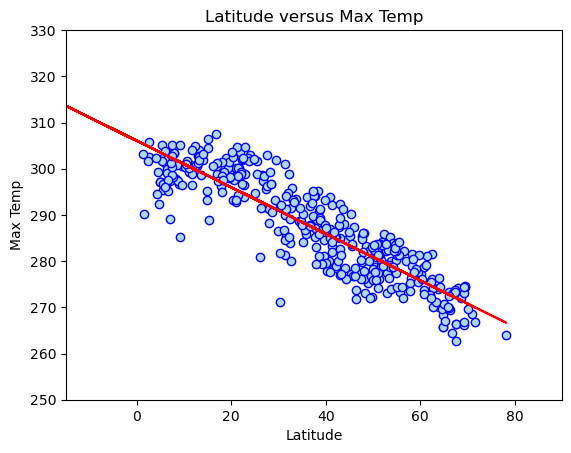

In [51]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-15, 90)
plt.ylim(250, 330)
plt.title("Latitude versus Max Temp")

# Get regression values
regress_values = x*slope + intercept
print(f" The r-value is {rvalue**2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (5,-10), fontsize = 12, color = 'red')
plt.show()

 The r-value is 0.45063062010371424


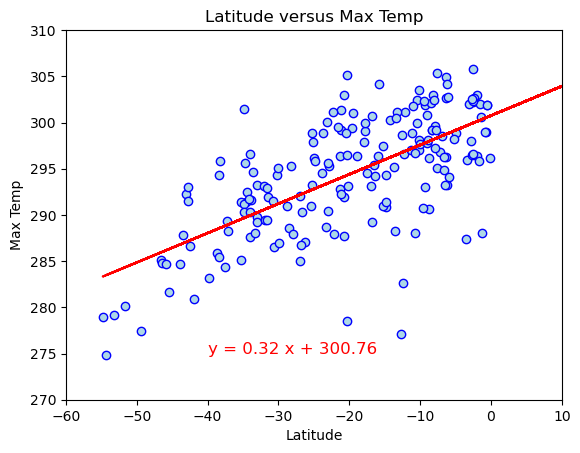

In [52]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-60, 10)
plt.ylim(270, 310)
plt.title("Latitude versus Max Temp")

# Get regression values
regress_values = x*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f" The r-value is {rvalue**2}")
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-40,275), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship: Out of all the plots in WeatherPy, temperature looks the most strongly correlated to latitude. We see a tight fit and r-value of 0.8, suggesting strong correlation, for the northern hempisphere and an r-value of 0.45 for the southern hemisphere. This is a weaker correlation, but we can still see a general trend. As latitude apporaches the equator (0), max temperatures get warmer. 

### Humidity vs. Latitude Linear Regression Plot

The r squared value is 0.0005863382460413738


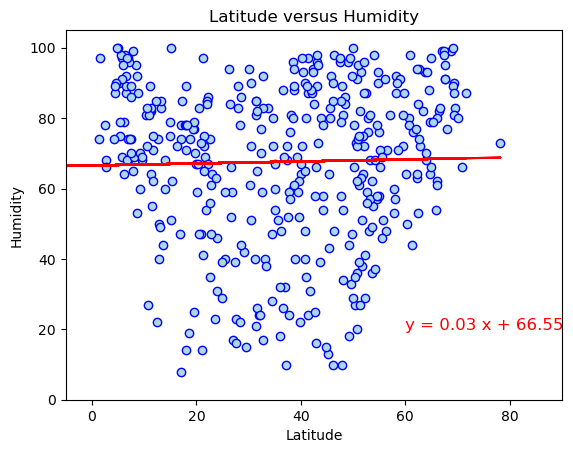

In [30]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-5, 90)
plt.ylim(0, 105)
plt.title("Latitude versus Humidity")

# Get regression values
regress_values = x*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r squared value is {rvalue **2}")
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (60,20), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.08016399810258361


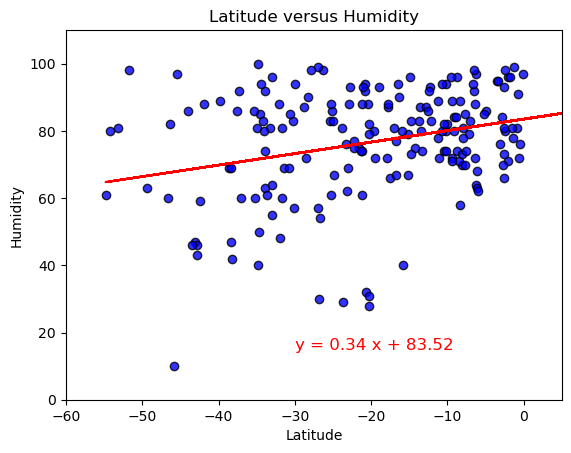

In [36]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'blue', alpha = 0.8, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude versus Humidity")

# Get regression values
regress_values = x*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r squared value is {rvalue **2}")
plt.plot(x, regress_values, 'r-')
plt.xlim(-60,5)
plt.ylim(0,110)
plt.annotate(line_eq, (-30,15), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** Neither hemisphere's map shows a significant correlation between latitude and humidity. The relationship is not very linear, but there is a higher slope/trend for the southern hemisphere. One thing I saw was there was higher humidity values for latitudes closer to the equator. At latitudes further from the equator, there are some low humidity values, but nothing below ~50 near the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r squared value is 0.00012091228289320402


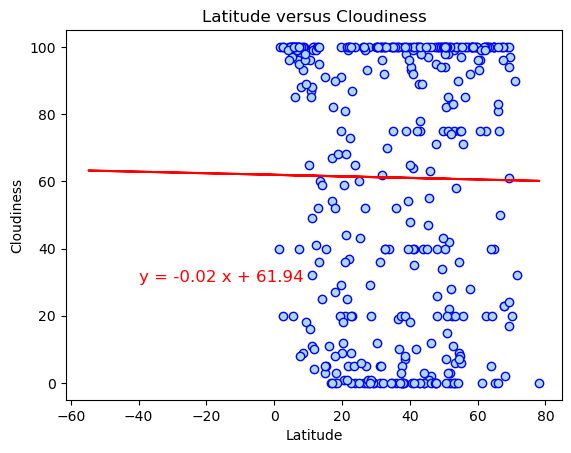

In [37]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude versus Cloudiness")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-40,30), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.028824893237988206


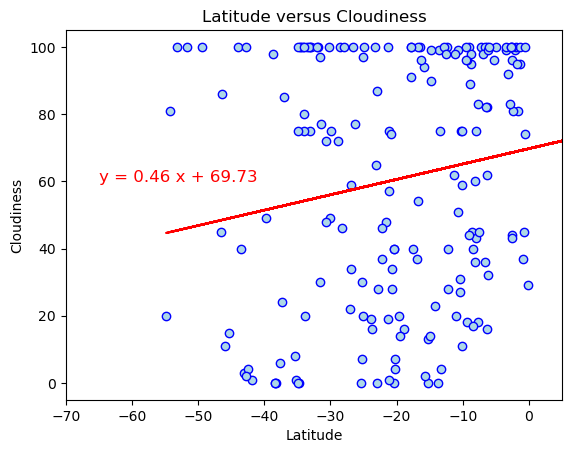

In [41]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude versus Cloudiness")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.xlim(-70,5)
plt.ylim(-5,105)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-65,60), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** I did not notice any trends with latitude versus cloudiness. the data seems slightly more correlated for the southern hemisphere than the north but overall there does not appear to be much correlation for cloudiness vs. lat. 

### Wind Speed vs. Latitude Linear Regression Plot

The r squared value is 0.023577402445071817


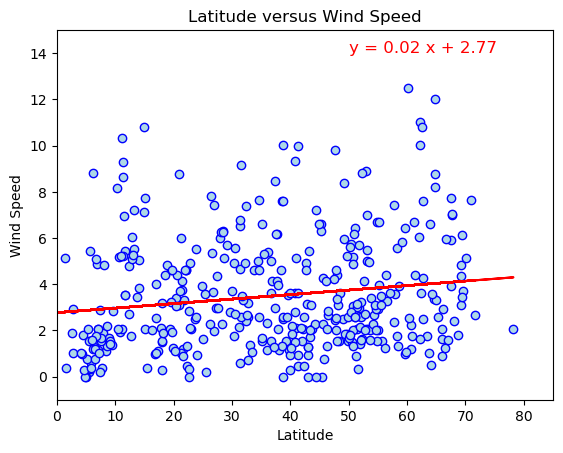

In [47]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude versus Wind Speed")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.xlim(0,85)
plt.ylim(-1,15)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (50,14), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.08321896431189398


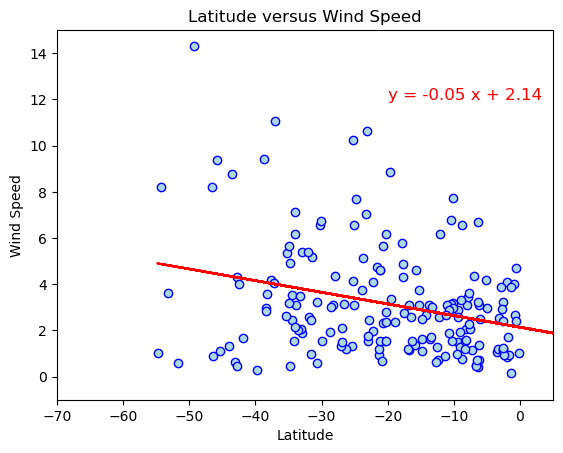

In [49]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude versus Wind Speed")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.xlim(-70,5)
plt.ylim(-1,15)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-20,12), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** Both hemispheres showed relatively low wind speeds on average, most in single digits. There is a weak correlation showing wind speeds dropping as the points approach the equator, and I did notice a couple higher wind speed values further from the equator. Overall, the correlation is very weak. 